In [1]:
import numpy as np
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
idm_path = 'idm/nuevoScan2/'

In [9]:
def cargado_archivos(archivos):
    """
    Combina múltiples archivos CSV en una única tabla, manejando archivos vacíos o inexistentes.

    Args:
        archivos (list): Lista de rutas de archivos CSV.

    Returns:
        Table: Tabla combinada. Si no hay archivos válidos, retorna una tabla vacía.
    """
    datos = None  # Inicializamos como None para manejar el primer archivo válido

    for archivo in archivos:
        try:
            tabla_temp = Table.read_table(archivo)
            if tabla_temp.num_rows > 0:
                if datos is None:  # Primer archivo válido
                    datos = tabla_temp
                else:
                    datos.append(tabla_temp)  # Append a la tabla existente
        except FileNotFoundError:
            print(f"Error: {archivo} no existe.")
        except Exception as e:  # Otros errores (ej: formato incorrecto)
            print(f"Error al cargar {archivo}: {str(e)}")

    return Table() if datos is None else datos  # Retorna tabla vacía si no hay datos


#Los valores reportados por Planck
val_exp = 0.12 #Valor observado
error = 0.001 #Error reportado por Planck 
#Queremos que el valor sea calculado a 3 sigma, o sea, 3 veces el error reportado por Planck 
sigma = 3
val_por = sigma *  error 
val_min = round(val_exp - val_por,3)
val_max = round(val_exp + val_por,3)

def omega_idm(df_):
    global val_min, val_max
    df = df_.copy()
    df['Densidad reliquia'] = np.round(df.column('Densidad reliquia'),3)
    return df.where('Densidad reliquia', are.between_or_equal_to(val_min,val_max))

def omega_scalar(df_):
    global val_min, val_max
    df = df_.copy()
    df['Densidad reliquia'] = np.round(df.column('Densidad reliquia'),3)
    return df.where('Densidad reliquia', are.between_or_equal_to(val_min,val_max))

def graficador_elementos():
    plt.figure(figsize=(10,7))
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'$\epsilon$',size=20)
    plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim(0.9,1e3+100)

In [61]:
archivos1 = [f'{idm_path}analisis_random_Delta0p1_alpha0p5_R2.2_1.csv']
df_0p1_alpha_0p5_R2p2 = omega_idm(cargado_archivos(archivos1))

archivos1 = [f'{idm_path}analisis_random_Delta0p1_alpha0p5_R2.5_2.csv']
df_0p1_alpha_0p5_R2p5 = omega_idm(cargado_archivos(archivos1))

archivos1 = [f'{idm_path}analisis_random_Delta0p1_alpha0p5_R3_3.csv']
df_0p1_alpha_0p5_R3 = omega_idm(cargado_archivos(archivos1))

archivos1 = [f'{idm_path}analisis_random_Delta0p05_alpha0p5_R3_1.csv']
df_0p1_alpha_0p05_R3 = omega_idm(cargado_archivos(archivos1))

archivos1 = [f'{idm_path}analisis_random_Delta0p2_alpha0p5_R3_1.csv']
df_0p2_alpha_0p5_R3 = omega_idm(cargado_archivos(archivos1))

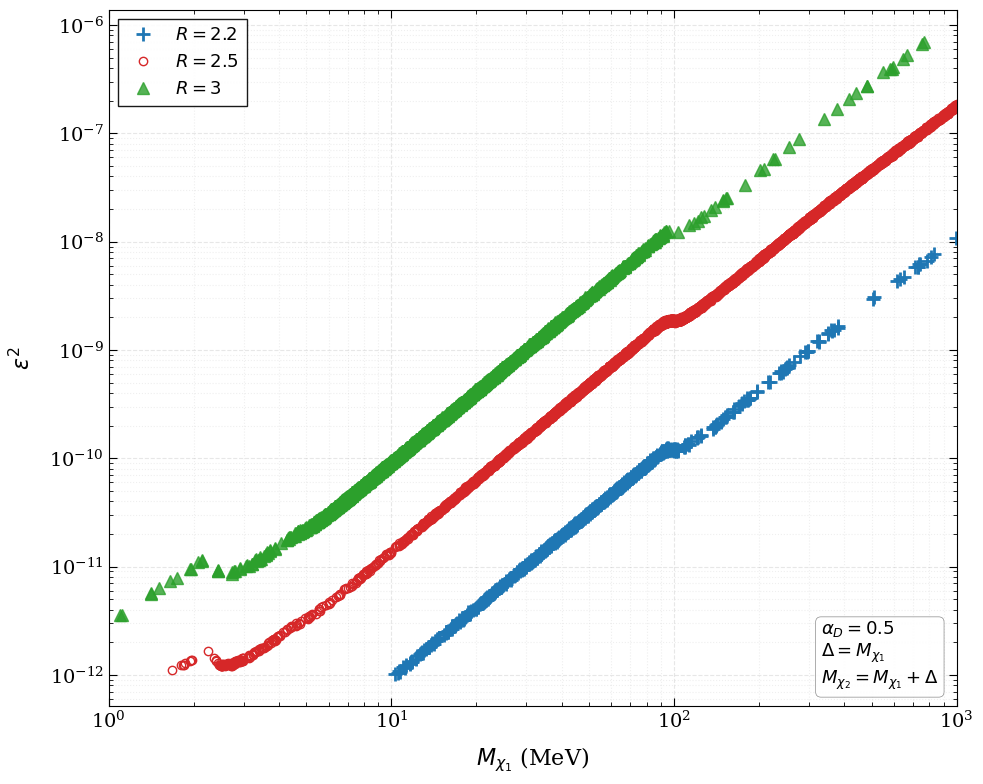

In [63]:
plt.figure(figsize=(10, 8))
plt.minorticks_on()

# Colores típicos de papers de física
colors = ['#1f77b4', '#d62728', '#2ca02c']

# Plot de los datos (igual que antes)
plt.plot(df_0p1_alpha_0p5_R2p2.column('Mchi1')*1e3, df_0p1_alpha_0p5_R2p2.column('epsilon')**2, 
         '+', color=colors[0], markeredgewidth=2, markersize=10, 
         label=r'$R = 2.2$')

plt.plot(df_0p1_alpha_0p5_R2p5.column('Mchi1')*1e3, df_0p1_alpha_0p5_R2p5.column('epsilon')**2, 
         'o', color=colors[1], markeredgewidth=1, markersize=6, 
         markerfacecolor='none', label=r'$R = 2.5$')

plt.plot(df_0p1_alpha_0p5_R3.column('Mchi1')*1e3, df_0p1_alpha_0p5_R3.column('epsilon')**2, 
         '^', color=colors[2], markeredgewidth=1, markersize=8, 
          markerfacecolor=colors[2], alpha=0.8, label=r'$R = 3$')

plt.xscale('log')
plt.yscale('log')

# Ejes y ticks
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3)

plt.xlim(1, 1000)

# Cuadrícula
plt.grid(True, linestyle='--', alpha=0.3, which='major')
plt.grid(True, linestyle=':', alpha=0.2, which='minor')

# Etiquetas de ejes
plt.ylabel(r'$\epsilon^2$', size=16, labelpad=10)
plt.xlabel(r'$M_{\chi_1}$ (MeV)', size=16, labelpad=10)

# CUADRO DE TEXTO CON ESPACIO DE PARÁMETROS (en lugar de título)
param_text = (
    r'$\alpha_D = 0.5$' + '\n' +
    r'$\Delta = M_{\chi_1}$' + '\n' +
    r'$M_{\chi_2} = M_{\chi_1} + \Delta$'  # puedes añadir más parámetros
)

plt.text(0.84, 0.02, param_text, transform=plt.gca().transAxes,
         fontsize=13, 
         verticalalignment='bottom',    # Alineación vertical inferior
         horizontalalignment='left',   # Alineación horizontal derecha
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                  edgecolor='gray', linewidth=0.5),
         linespacing=1.2)

# Leyenda
plt.legend(fontsize=13, framealpha=0.9, loc='best',
           fancybox=False, shadow=False, frameon=True,
           edgecolor='black', facecolor='white')

# Marco del gráfico
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

plt.tight_layout()

# Configuración global
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 13,
})

plt.savefig('imagenes_idms/parametrosIDM.jpg',dpi=300)
plt.show()

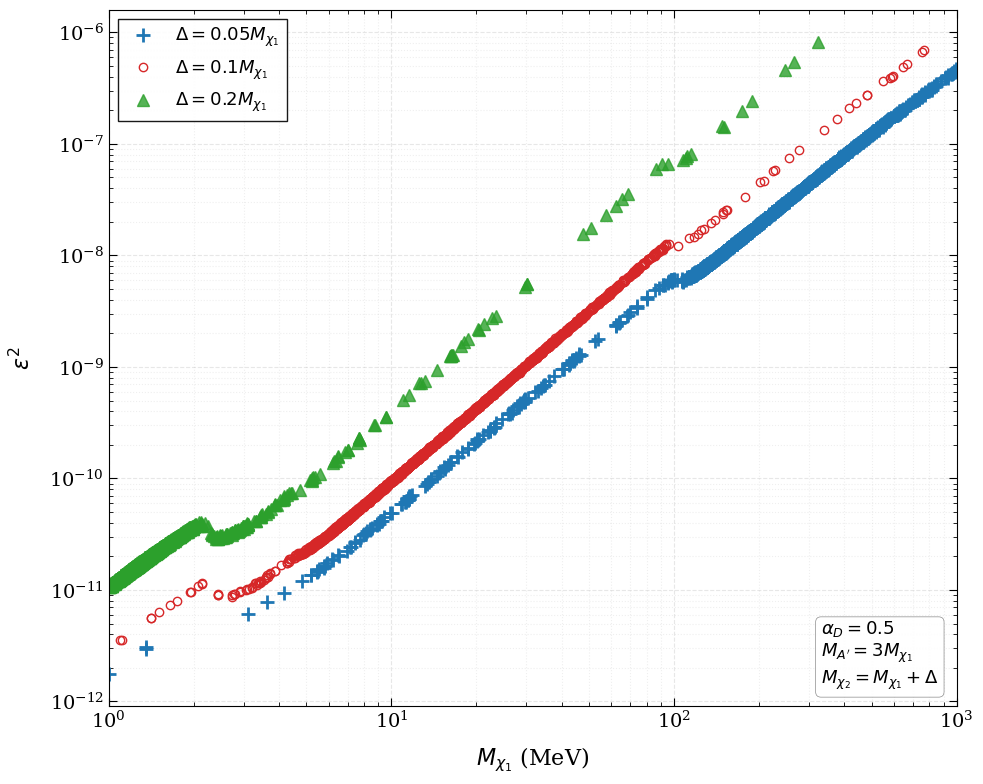

In [53]:
plt.figure(figsize=(10, 8))
plt.minorticks_on()

# Colores típicos de papers de física
colors = ['#1f77b4', '#d62728', '#2ca02c']

# Plot de los datos (igual que antes)
plt.plot(df_0p1_alpha_0p05_R3.column('Mchi1')*1e3, df_0p1_alpha_0p05_R3.column('epsilon')**2, 
         '+', color=colors[0], markeredgewidth=2, markersize=10, 
         label=r'$\Delta = 0.05M_{\chi_1}$')
plt.plot(df_0p1_alpha_0p5_R3.column('Mchi1')*1e3, df_0p1_alpha_0p5_R3.column('epsilon')**2, 
         'o', color=colors[1], markeredgewidth=1, markersize=6, 
         markerfacecolor='none', label=r'$\Delta = 0.1M_{\chi_1}$')
plt.plot(df_0p2_alpha_0p5_R3.column('Mchi1')*1e3, df_0p2_alpha_0p5_R3.column('epsilon')**2, 
         '^', color=colors[2], markeredgewidth=1, markersize=8, 
         markerfacecolor=colors[2], alpha=0.8, label=r'$\Delta = 0.2M_{\chi_1}$')

plt.xscale('log')
plt.yscale('log')

# Ejes y ticks
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3)

plt.xlim(1, 1000)

# Cuadrícula
plt.grid(True, linestyle='--', alpha=0.3, which='major')
plt.grid(True, linestyle=':', alpha=0.2, which='minor')

# Etiquetas de ejes
plt.ylabel(r'$\epsilon^2$', size=16, labelpad=10)
plt.xlabel(r'$M_{\chi_1}$ (MeV)', size=16, labelpad=10)

# CUADRO DE TEXTO CON ESPACIO DE PARÁMETROS (en lugar de título)
param_text = (
    r'$\alpha_D = 0.5$' + '\n' +
    r'$M_{A^{\prime}} = 3 M_{\chi_1}$' + '\n' +
    r'$M_{\chi_2} = M_{\chi_1} + \Delta$'  # puedes añadir más parámetros
)

plt.text(0.84, 0.02, param_text, transform=plt.gca().transAxes,
         fontsize=13, 
         verticalalignment='bottom',    # Alineación vertical inferior
         horizontalalignment='left',   # Alineación horizontal derecha
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                  edgecolor='gray', linewidth=0.5),
         linespacing=1.2)

# Leyenda
plt.legend(fontsize=13, framealpha=0.9, loc='best',
           fancybox=False, shadow=False, frameon=True,
           edgecolor='black', facecolor='white')

# Marco del gráfico
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

plt.tight_layout()

# Configuración global
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 13,
})

plt.savefig('imagenes_idms/parametrosIDM2.jpg',dpi=300)
plt.show()